In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('car data3.csv')


In [2]:
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,Vehicle Size,highway MPG,city mpg,Popularity,MSRP,Trans_Reg
0,2011,335,6,2,1,26,19,3916,46135,0
1,2011,300,6,2,1,28,19,3916,40650,0
2,2011,300,6,2,1,28,20,3916,36350,0
3,2011,230,6,2,1,28,18,3916,29450,0
4,2011,230,6,2,1,28,18,3916,34500,0


In [3]:
#random forest——Old variables
col = ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']
X = df[col].values
Y = df['MSRP']
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
#random forest
forest = RandomForestRegressor(
    n_estimators=20,
    random_state=1)
forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=1)

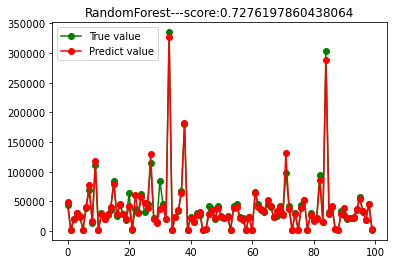

In [5]:
import matplotlib.pyplot as plt

score = forest.score(x_test, y_test)
result = forest.predict(x_test)
plt.figure()
#Only take the first 100 visualizations because there is too much data
plt.plot(np.arange(100), y_test[:100], "go-", label="True value")
plt.plot(np.arange(100), result[:100], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score}")
plt.legend(loc="best")
plt.show()

#visualize the result (score = r^2)

In [6]:
# complete the importance evaluation for the trained random forest
# feature_importances
importances = forest.feature_importances_
print("Feature Importance：", importances)
x_columns = ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','Popularity']

#Returns the index value of the array from the largest to the smallest
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, col[indices[f]], importances[indices[f]]))

# Filter variables (select variables with higher importance)
threshold = 0.15
x_selected = x_train[:, importances > threshold]


Feature Importance： [0.06080388 0.47393646 0.30951153 0.00655026 0.0282841  0.04604437
 0.07486941]
 1) Engine HP                      0.473936
 2) Engine Cylinders               0.309512
 3) Popularity                     0.074869
 4) Year                           0.060804
 5) city mpg                       0.046044
 6) highway MPG                    0.028284
 7) Number of Doors                0.006550


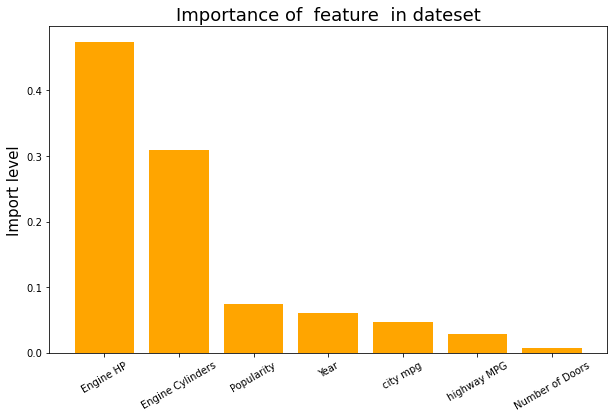

In [7]:
# visualize feature importance

plt.figure(figsize=(10, 6))
plt.title("Importance of  feature  in dateset", fontsize=18)
plt.ylabel("Import level", fontsize=15, rotation=90)

x_columns1 = [x_columns[i] for i in indices]
for i in range(len(x_columns)):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(len(x_columns)), x_columns1, fontsize=10, rotation =30)
plt.show()
